# Sprint 1: Data analysis and supervised learning

## Exploratory Data Analysis

Inlezen van het CSV bestand naar een DataFrame.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

rows_to_read = None # Gewenst aantal rijen inlezen (None = allemaal)

complaints = pd.read_csv('data/complaints.csv', delimiter=',', nrows=rows_to_read)

rows, cols = complaints.shape

print(f'There are {rows} rows and {cols} columns')

There are 485701 rows and 18 columns


In [51]:
# Uitvoer inverteren voor betere leesbaarheid
complaints.head().T

,0,1,2,3,4
Date received,07/23/19,07/26/19,06/03/19,07/03/19,07/14/19
Product,"Credit reporting, credit repair services, or o...",Debt collection,Debt collection,Debt collection,"Credit reporting, credit repair services, or o..."
Sub-product,Credit reporting,I do not know,I do not know,Other debt,Credit reporting
Issue,Credit monitoring or identity theft protection...,False statements or representation,Attempts to collect debt not owed,Attempts to collect debt not owed,Improper use of your report
Sub-issue,Problem canceling credit monitoring or identif...,Attempted to collect wrong amount,Debt was paid,Debt was result of identity theft,Received unsolicited financial product or insu...
Consumer complaint narrative,I have complained many times that the credit r...,please review the current fraud account and al...,Called multiple times over the years for a deb...,I sent in a letter to the company to have them...,On XX/XX/19 I applied for a Debt Relief Produc...
Company public response,Company has responded to the consumer and the ...,Company believes it acted appropriately as aut...,None,None,None
Company,Experian Information Solutions Inc.,"Ideal Collection Services, Inc.","ONEMAIN FINANCIAL HOLDINGS, LLC.","Diversified Consultants, Inc.","ClearOne Advantage, LLC"
State,CA,FL,FL,VA,PA
ZIP code,926XX,333XX,327XX,232XX,191XX


Om de data beter te begrijpen maken we een nieuwe DataFrame met slechts 3 kolommen.
- Product
- Sub-product
- Consumer complaint narrative

Met deze DataFrame gaan we het aantal klachten voor elke categorie van producten en sub-producten bepalen.

In [52]:
# Nieuwe DataFrame aanmaken met 3 kolommen
df = complaints[['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative']].copy()

# Kolommen een simpelere naam geven
df.columns = ['Product', 'Sub_Product', 'Issue', 'Sub_Issue', 'Narrative'] 

df.head()

,Product,Sub_Product,Issue,Sub_Issue,Narrative
0,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...
1,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...
2,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...
3,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...
4,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...


### Aantal klachten per categorie van producten

In [96]:
print('Aantal product categorieën:', pd.DataFrame(complaints.Product.unique()).size)

Aantal product categorieën: 18


Er zijn meer dan 18 verschillende categorieën voor de producten. Sommige zijn echter heel erg gerelateerd aan elkaar. Daarom kan het nuttig zijn om sommige categorieën samen te nemen om de accuraatheid van het te bekomen model te verbeteren.
- 'Credit reporting, repair, or other'
    - 'Credit reporting, credit repair services, or other personal consumer reports'
    - 'Credit reporting'
- 'Credit card or prepaid card'
    - 'Credit card'
    - 'Prepaid card'
- 'Payday loan, title loan, or personal loan
    - 'Payday loan'
- 'Money transfer, virtual currency, or money service'
    - 'Money transfer' 
    - 'Virtual currency'

In [54]:
df.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [55]:
pd.DataFrame(df.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Debt collection
2,"Payday loan, title loan, or personal loan"
3,Mortgage
4,Credit card or prepaid card
5,Checking or savings account
6,Student loan
7,Vehicle loan or lease
8,"Money transfer, virtual currency, or money ser..."
9,Bank account or service


Er blijven nu slechts 13 product categorieën over.

Om het mogelijk te maken om een model te ontwikkelen gaan we elke categorie die in tekstvorm in de dataset staat, gaan voorstellen als een getal. Hiervoor voegen we een nieuwe kolom toe met als naam 'Category_Id'.

In [56]:
df['Category_Id'] = df['Product'].factorize()[0]

# Dictionary aanmaken die de 'Category_Id - Product' combinaties bevat
categories = dict(df[['Category_Id', 'Product']].drop_duplicates().values)
categories

{0: 'Credit reporting, repair, or other',
 1: 'Debt collection',
 2: 'Payday loan, title loan, or personal loan',
 3: 'Mortgage',
 4: 'Credit card or prepaid card',
 5: 'Checking or savings account',
 6: 'Student loan',
 7: 'Vehicle loan or lease',
 8: 'Money transfer, virtual currency, or money service',
 9: 'Bank account or service',
 10: 'Consumer Loan',
 11: 'Money transfers',
 12: 'Other financial service'}

In [57]:
# Nieuwe DataFrame met de extra kolom weergeven
df.head()

,Product,Sub_Product,Issue,Sub_Issue,Narrative,Category_Id
0,"Credit reporting, repair, or other",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,0
1,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,1
2,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,1
3,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,1
4,"Credit reporting, repair, or other",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,0


Vervolgens gaan we het aantal producten per categorie bepalen en visualiseren in een barplot.

In [58]:
# Aantal products
product_counts = pd.DataFrame({'Count': df.groupby(['Product']).size()})
product_counts

,Count
Product,
Bank account or service,14885
Checking or savings account,18784
Consumer Loan,9473
Credit card or prepaid card,51770
"Credit reporting, repair, or other",173330
Debt collection,105765
"Money transfer, virtual currency, or money service",7751
Money transfers,1497
Mortgage,61094


<Figure size 720x360 with 0 Axes>

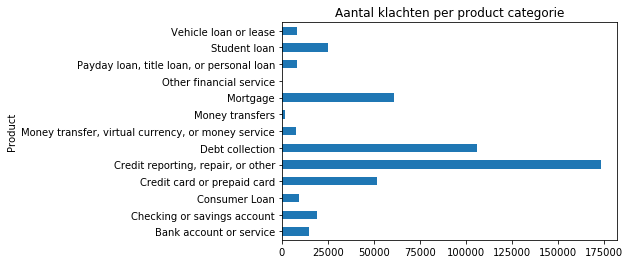

In [93]:
fig = plt.figure(figsize=(10, 5))
product_counts.plot.barh(title="Aantal klachten per product categorie", legend=None)

De verdeling van de data over de verschillende categorieën is niet gebalanceerd. Dit kan voor problemen zorgen bij het classificeren aangezien de kleine categorieën als uitschieters gezien kunnen worden. We zouden deze categorieën kunnen oversampelen zodat de dataset gebalanceerd wordt, maar aangezien de categorieën die het meest voorkomen ook het meest waarschijnlijk voorkomen tijdens het classificeren, zullen we dit niet doen.

Om deze categorieën van producten en sub-producten beter te begrijpen, gaan we het verband tussen beiden gaan onderzoeken.

In [80]:
sub_product_counts = pd.DataFrame({'Count': df.groupby(['Product', 'Sub_Product']).size()})
sub_product_counts

Count
Product                 Sub_Product                              
Bank account or service (CD) Certificate of deposit           274
                        Cashing a check without an account    134
                        Checking account                    10113
                        Other bank product/service           3477
                        Savings account                       887
...                                                           ...
Student loan            Non-federal student loan             5753
                        Private student loan                 4885
Vehicle loan or lease   Lease                                1437
                        Loan                                 6632
                        Title loan                             10

[95 rows x 1 columns]

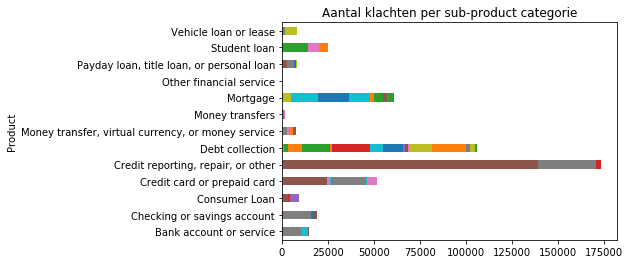

In [95]:
sub_product_counts.unstack().plot(kind='barh', stacked=True, legend=None, title="Aantal klachten per sub-product categorie")

## Classification Experiments